<a href="https://colab.research.google.com/github/pb-roshith/Deep-CNN-Autoencoder---Image-Compression/blob/main/Deep_CNN_Autoencoder_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

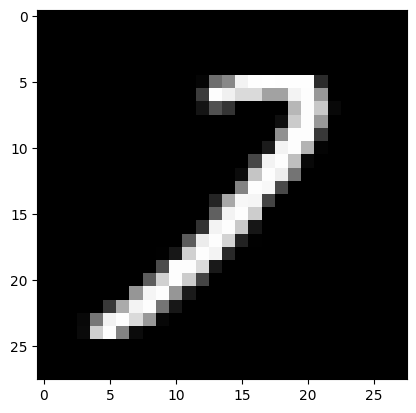

In [8]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

In [9]:
model = Sequential([
    # encoder
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    # decoder
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    # output
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 547ms/step - loss: 0.1110 - val_loss: 0.0835
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 547ms/step - loss: 0.0824 - val_loss: 0.0783
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 536ms/step - loss: 0.0778 - val_loss: 0.0753
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 125s 531ms/step - loss: 0.0756 - val_loss: 0.0737
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 125s 531ms/step - loss: 0.0741 - val_loss: 0.0725
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 526ms/step - loss: 0.0730 - val_loss: 0.0717
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 543ms/step - loss: 0.0722 - val_loss: 0.0711
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 547ms/step - loss: 0.0715 - val_loss: 0.0705
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 537ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 549ms/step - loss: 0.0707 - val_loss: 0.0698


In [14]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


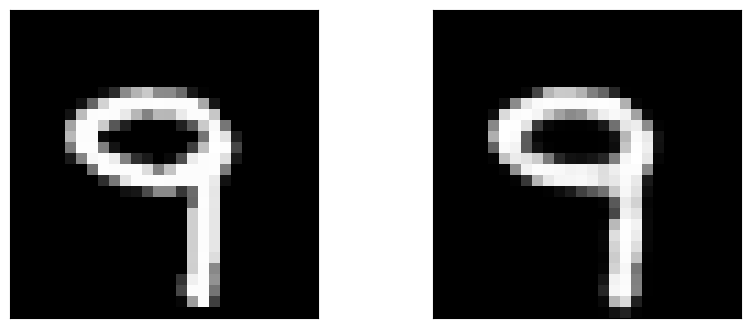

In [20]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))

ax=plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax=plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()